# 학생활동 주간 비교과 프로그램 설문조사 통계처리 예제

## 필요한 패키지 포함시키기 
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder

## 한글 처리 위한 명령문

In [333]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=16
fig_size[1]=14
sns.set_context("talk")   

## 데이터 파일 읽어오기 (CSV 파일)

In [334]:
df = pd.read_csv("C:/Users/suer/Dropbox/job/sweat2.csv", engine='python')

## Missing Value 처리 
- missing value 삭제

In [335]:
df = df.replace(9999, np.NaN)
df.dropna(axis=0, how='any', inplace=True)

## 읽어온 데이터 살펴보기
- head() 처음부터 5개의 행을 출력
- tail() 끝에서 5개의 행을 출력
- head(10) 처움부터 10개의 행을 출력

In [336]:
df.head()

,프로그램명,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,학과,연령,학년,성별
0,One-day 입사사류,1.0,1,1.0,1,1,3.0,건축학과,21.0,3.0,2.0
1,One-day 입사사류,1.0,1,1.0,1,1,3.0,건축학과,24.0,4.0,2.0
2,One-day 입사사류,1.0,1,1.0,1,1,3.0,건축학과,24.0,4.0,1.0
3,One-day 입사사류,1.0,1,1.0,1,1,3.0,건축학과,25.0,4.0,1.0
4,One-day 입사사류,1.0,1,1.0,1,1,1.0,건축학과,23.0,4.0,1.0


## 설문서에서 만족도 값 변환
### 설문서에서 만족도를 1->5, 2->4 등으로 코딩되어서 변환함

In [337]:
score = {1:5,2:4,3:3,4:2,5:1}
df['만족도'] = df['만족도'].map(score)
df['유익성'] = df['유익성'].map(score)
df['진행자'] = df['진행자'].map(score)
df['진로취업도움'] = df['진로취업도움'].map(score)
df['커리큘럼적정성'] = df['커리큘럼적정성'].map(score)
df['합계'] = 0 
sumcol = ['만족도', '유익성', '진행자', '진로취업도움', '커리큘럼적정성']
for x in sumcol:
    df['합계'] += df[x]

## Pandas Crosstab 함수
## 교차표 작성하기
### 프로그램별 추후참여 프로그램을 표로 나타내기
- 합계를 표시하려면 margins=True
- 퍼센트로 표시하려면 normalize='index'
### 아래 명령문은 프로그램별 추후참여 희망 내용 교차표

In [338]:
pd.crosstab(df['프로그램명'],df['추후참여'], normalize='index')

추후참여,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
프로그램명,,,,,,,,,
CAP+,0.166667,0.166667,0.055556,0.333333,0.000000,0.166667,0.111111,0.000000,0.000000
NCS기반 취업완전정복특강,0.166667,0.250000,0.250000,0.194444,0.027778,0.111111,0.000000,0.000000,0.000000
One-day 입사사류,0.344538,0.334034,0.084034,0.121849,0.021008,0.058824,0.012605,0.010504,0.012605
공모전을 취업에 활용하기,0.156250,0.187500,0.052083,0.156250,0.250000,0.125000,0.041667,0.010417,0.020833
데일카네기 리더십캠프,0.118012,0.403727,0.055901,0.118012,0.080745,0.149068,0.012422,0.018634,0.043478
모의경영을 퉁한 직무설정,0.086957,0.173913,0.043478,0.434783,0.043478,0.217391,0.000000,0.000000,0.000000
무역실무,0.166667,0.111111,0.111111,0.166667,0.000000,0.444444,0.000000,0.000000,0.000000
여대생 취업 DNA를 깨워라,0.240000,0.280000,0.120000,0.140000,0.040000,0.090000,0.070000,0.000000,0.020000
영업마케팅,0.282051,0.487179,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000


In [339]:
pd.crosstab(df['학과'],[df['성별'],df['학년']], margins=True)

성별        1.0                 2.0                  All
학년        1.0  2.0  3.0  4.0  1.0  2.0  3.0  4.0      
학과                                                    
9999        0    0    0    0    0    0    1    0     1
건축학과       28   29   14   11   14   10    6    2   114
경영정보학과      0    2    9   39    0    0    4   12    66
경영학과        0    0    0    8    0    0    0    3    11
경영학부        0    0    0    0    1    0    0    0     1
경찰행정학과      0    4    5   12    0    3    8    4    36
광고홍보학과      0    5    3    2    3    6   12    4    35
교육학과        0    0    0    3    0    0    0    6     9
금융보험학과      1   14    9   18    1    7   12    8    70
금융보험학전공     0    0    8    0    0    0    3    0    11
레저스포츠학과    34   11    7   12    6    3    1    3    77
멀티미디어학과     0   16   12    5    0    8    7    9    57
무역학과        0   10    8    7    1   14    2    3    45
뷰티학과        0    0    0    2   22   16    6   10    56
사회교육과       0    0    0    1    0    0    0    6     7
사회복지학과      0    4   10   13    1    2   11   20    61
생물교육과       0    0    0   13    0    0    0   10    23
식품공학        0    5    3    2    0    2    1    0    13
식품공학과       0    2    1    9    1    4    1    5    23
식품공학전공      0    0    0    2    0    0    3    1     6
식품영양학과      7    0    0    5   46    0    1   22    81
역사교육과       0    0    0    9    0    0    0    6    15
영어과         0    0    1    0    0    0    0    0     1
영어교육과       0    0    0    6    0    0    0    3     9
유아교육과       0    0    0    0    5   19   12    0    36
유통경영정보      0    0    0    1    0    0    0    0     1
융합디자인학과     0    6    6    7    0    5    3    7    34
융합보안학과      2    6    0    1    0    0    2    0    11
임상건강운동학과    0    4    1   12    0    2    0    1    20
정보통신공학과     0    6    0   14    0    1    0    0    21
제약공학과       0    0    0    0    0    0    4    0     4
제약식품공학부    28    0    0    0   47    0    0    0    75
중국어과        4    0    0    0   14    0    0    0    18
컴퓨터공학과     28    8   34   15    0    0    7    7    99
패션의류학과     14    0    0    4   14    0    0    8    40
한국어문학과      0    1    1    7    0    0    4    8    21
한국어어문학과     0    4    3    0    0    0   12    0    19
항공서비스학과    29   20    9   10   36   21   17   42   184
호텔외식조리학과    0    9    2    6    2    8    0   18    45
화장품학부      17    0    0    7   41    0    0   15    80
환경공학과       0    0    0   10    0    0    0    0    10
회계학과        0    0   13   14    4    1    1   11    44
All       192  166  159  287  259  132  141  254  1590

## Groupby 함수
- dataframe.groupby('그룹화 할 열')
- df.groupby('프로그램명').mean() # 프로그램명으로 그룹화하고 평균값을 계산

In [340]:
grpdf = df.groupby('프로그램명').mean()

In [341]:
grpdf

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,연령,학년,성별,합계
프로그램명,,,,,,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556,3.777778,21.500000,2.666667,1.222222,23.555556
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778,3.000000,20.833333,2.333333,1.083333,22.805556
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429,2.495798,22.760504,3.966387,1.464286,23.079832
공모전을 취업에 활용하기,4.312500,4.281250,4.541667,4.229167,4.218750,3.875000,20.302083,2.062500,1.479167,21.583333
데일카네기 리더십캠프,4.614907,4.546584,4.739130,4.472050,4.478261,3.490683,19.142857,1.416149,1.478261,22.850932
모의경영을 퉁한 직무설정,4.391304,4.347826,4.434783,4.000000,4.347826,3.826087,20.086957,2.173913,1.608696,21.521739
무역실무,4.166667,4.388889,4.277778,4.055556,4.666667,4.055556,20.777778,2.277778,1.833333,21.555556
여대생 취업 DNA를 깨워라,4.130000,4.100000,4.250000,4.110000,4.020000,3.130000,19.930000,2.480000,2.000000,20.610000
영업마케팅,4.128205,4.692308,4.410256,4.333333,4.589744,2.641026,23.974359,3.820513,1.205128,22.153846


In [342]:
df.groupby('성별').mean()

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,연령,학년,합계
성별,,,,,,,,,
1.0,4.477612,4.503731,4.584577,4.471393,4.458955,3.230100,21.694030,2.672886,22.496269
2.0,4.360051,4.374046,4.508906,4.316794,4.338422,3.148855,20.193384,2.496183,21.898219


## sort_value함수를 이용한 정렬
- sort_values(by='열이름', ascending=False) : 내림차순으로 정렬

In [343]:
(df.groupby('학년').mean()).sort_values(by='만족도', ascending=False)

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,연령,성별,합계
학년,,,,,,,,,
4.0,4.517560,4.584104,4.661738,4.563771,4.543438,2.536044,22.829945,1.469501,22.870610
1.0,4.401330,4.403548,4.545455,4.325942,4.363636,3.536585,18.580931,1.574279,22.039911
2.0,4.375839,4.332215,4.493289,4.288591,4.325503,3.429530,20.117450,1.442953,21.815436
3.0,4.313333,4.340000,4.396667,4.300000,4.266667,3.610000,21.960000,1.470000,21.616667


## 여러개의 열 값으로 정렬하기
- sort_values(by=['만족도','유의성','진행자'], ascending=False)

In [344]:
depmean = df.groupby('학과').mean()
depmean.sort_values(by=['만족도', '유익성','진행자'], ascending=False)

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,연령,학년,성별,합계
학과,,,,,,,,,,
유통경영정보,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,25.000000,4.000000,1.000000,25.000000
경영학과,5.000000,4.636364,4.727273,4.818182,4.727273,3.909091,23.363636,4.000000,1.272727,23.909091
교육학과,4.888889,4.888889,4.888889,4.888889,4.777778,1.888889,21.888889,4.000000,1.666667,24.333333
영어교육과,4.888889,4.777778,4.888889,4.777778,4.888889,2.333333,23.222222,4.000000,1.333333,24.222222
제약공학과,4.750000,4.500000,4.750000,4.250000,4.750000,2.250000,20.250000,3.000000,2.000000,23.000000
융합보안학과,4.727273,4.727273,4.818182,4.727273,4.727273,2.727273,20.272727,2.181818,1.181818,23.727273
화장품학부,4.687500,4.612500,4.787500,4.450000,4.425000,3.150000,19.562500,1.825000,1.700000,22.962500
정보통신공학과,4.666667,4.619048,4.904762,4.476190,4.619048,1.904762,22.285714,3.333333,1.047619,23.285714
중국어과,4.666667,4.333333,4.722222,4.277778,4.222222,3.777778,18.333333,1.000000,1.777778,22.222222


In [345]:
grpdf

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,연령,학년,성별,합계
프로그램명,,,,,,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556,3.777778,21.500000,2.666667,1.222222,23.555556
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778,3.000000,20.833333,2.333333,1.083333,22.805556
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429,2.495798,22.760504,3.966387,1.464286,23.079832
공모전을 취업에 활용하기,4.312500,4.281250,4.541667,4.229167,4.218750,3.875000,20.302083,2.062500,1.479167,21.583333
데일카네기 리더십캠프,4.614907,4.546584,4.739130,4.472050,4.478261,3.490683,19.142857,1.416149,1.478261,22.850932
모의경영을 퉁한 직무설정,4.391304,4.347826,4.434783,4.000000,4.347826,3.826087,20.086957,2.173913,1.608696,21.521739
무역실무,4.166667,4.388889,4.277778,4.055556,4.666667,4.055556,20.777778,2.277778,1.833333,21.555556
여대생 취업 DNA를 깨워라,4.130000,4.100000,4.250000,4.110000,4.020000,3.130000,19.930000,2.480000,2.000000,20.610000
영업마케팅,4.128205,4.692308,4.410256,4.333333,4.589744,2.641026,23.974359,3.820513,1.205128,22.153846


## 일부 열을 제거하기
- iloc[5, 1:10] # 5번째 행 두번째 열에서 9번째 열까지
- loc[:,'만족도'] # 모든 행 만족도 열

In [346]:
#sel = ['만족도', '유익성', '진행자', '진로취업도움', '커리큘럼적정성','합계']
grpdf = grpdf.iloc[:,[0,1,2,3,4]]

In [347]:
grpdf.head()

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성
프로그램명,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429
공모전을 취업에 활용하기,4.312500,4.281250,4.541667,4.229167,4.218750
데일카네기 리더십캠프,4.614907,4.546584,4.739130,4.472050,4.478261


## 상관계수 구하기
- corr() 함수

In [348]:
corr = grpdf.corr()

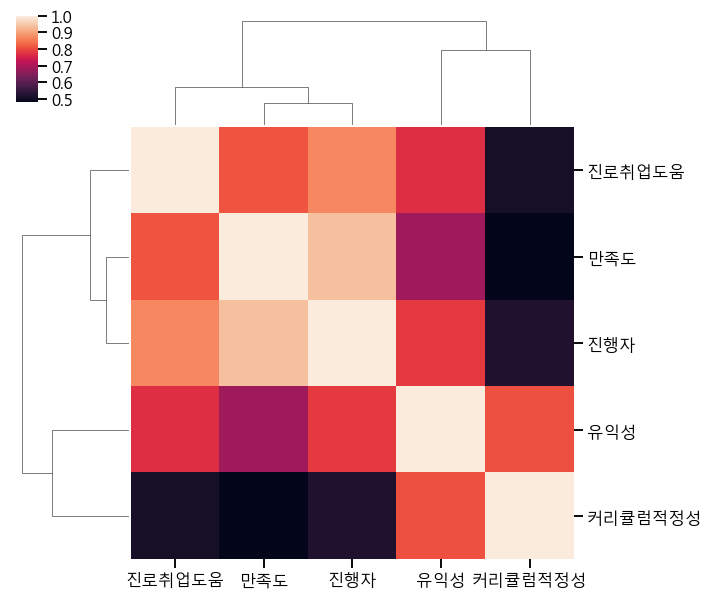

In [349]:
sns.clustermap(corr)

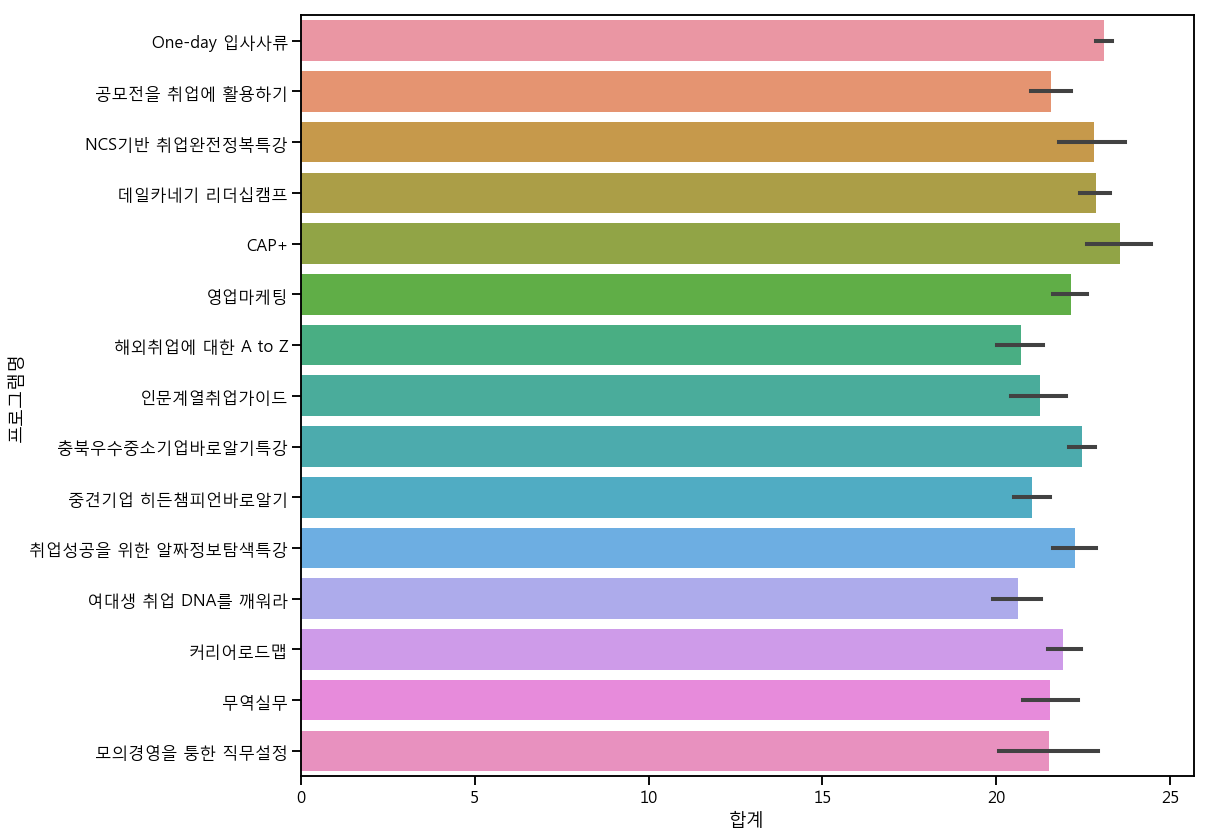

In [350]:
sns.barplot(x='합계', y='프로그램명', data=df)

In [351]:
#sns.barplot(data = grpdf.reset_index(), y = '프로그램명', x = '합계')

In [352]:
grpdf.sort_values(by='만족도',ascending=False)

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성
프로그램명,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778
데일카네기 리더십캠프,4.614907,4.546584,4.739130,4.472050,4.478261
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429
충북우수중소기업바로알기특강,4.489362,4.524823,4.546099,4.475177,4.432624
취업성공을 위한 알짜정보탐색특강,4.423077,4.461538,4.615385,4.410256,4.346154
모의경영을 퉁한 직무설정,4.391304,4.347826,4.434783,4.000000,4.347826
커리어로드맵,4.363636,4.384615,4.503497,4.300699,4.370629
공모전을 취업에 활용하기,4.312500,4.281250,4.541667,4.229167,4.218750


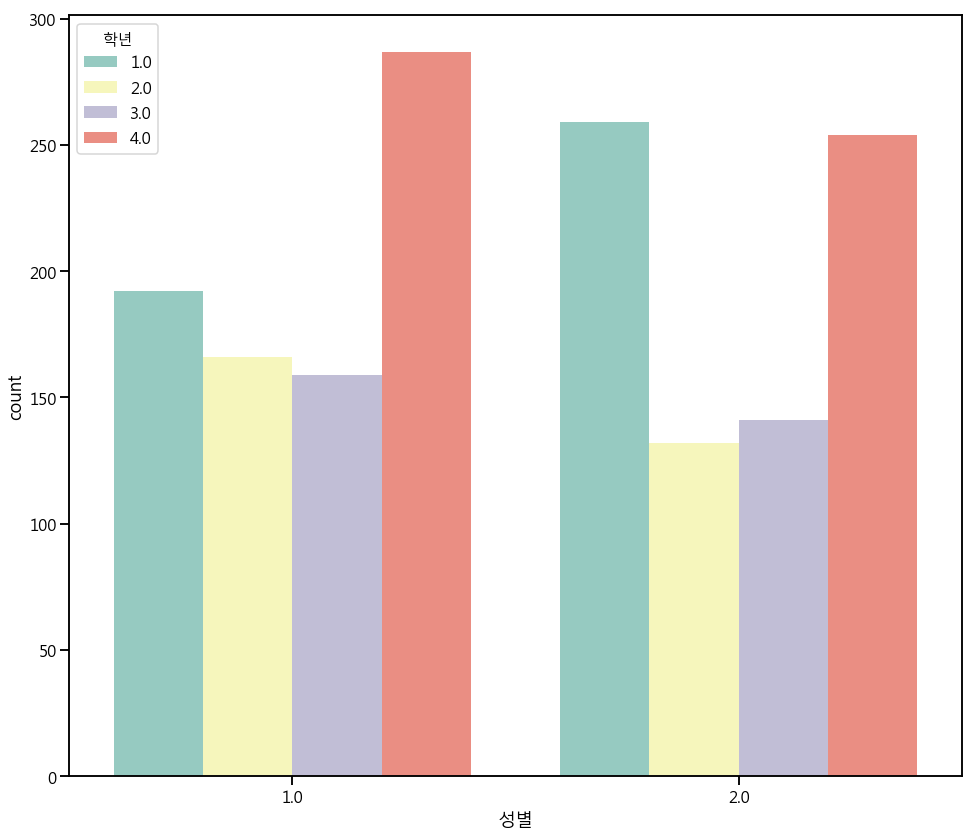

In [353]:
sns.countplot(x='성별',data=df, hue='학년', palette='Set3')

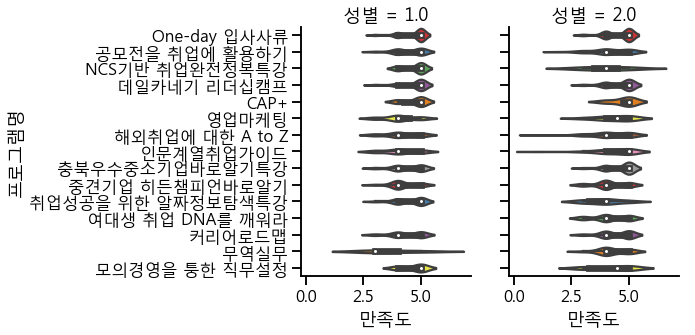

In [354]:
sns.catplot(y='프로그램명', x='만족도', col='성별', data=df, kind='violin', palette="Set1")

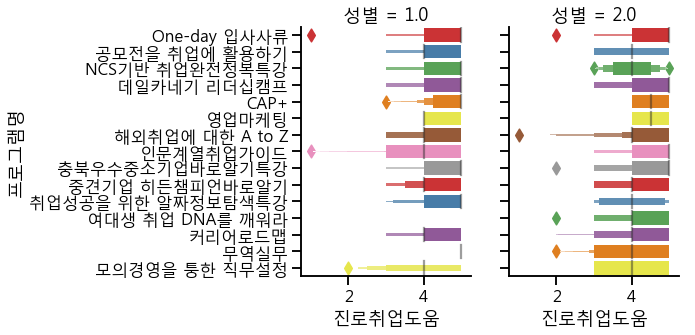

In [355]:
sns.catplot(y='프로그램명', x='진로취업도움', col='성별', data=df, kind='boxen', palette="Set1")

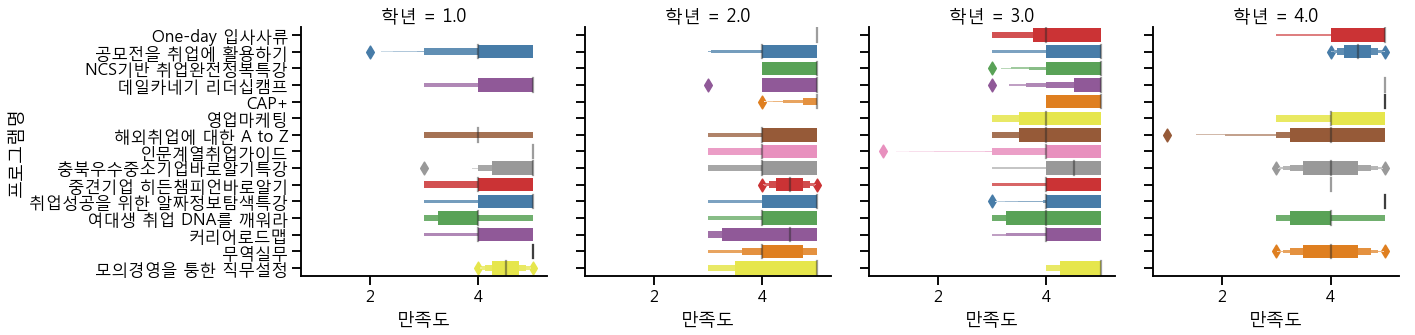

In [356]:
sns.catplot(x='만족도',y='프로그램명', col = '학년', kind='boxen',data=df, palette='Set1')

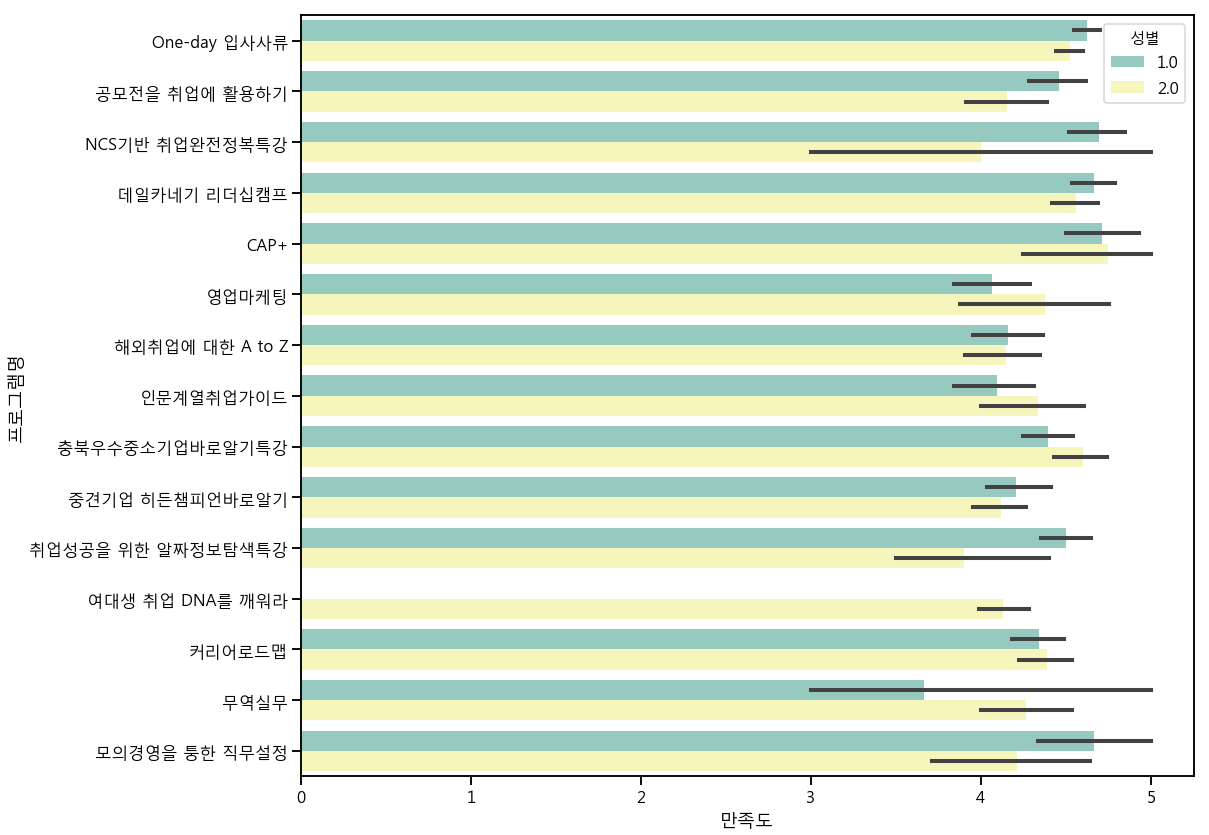

In [357]:
sns.barplot(x='만족도',y='프로그램명',data=df, hue='성별',palette='Set3')

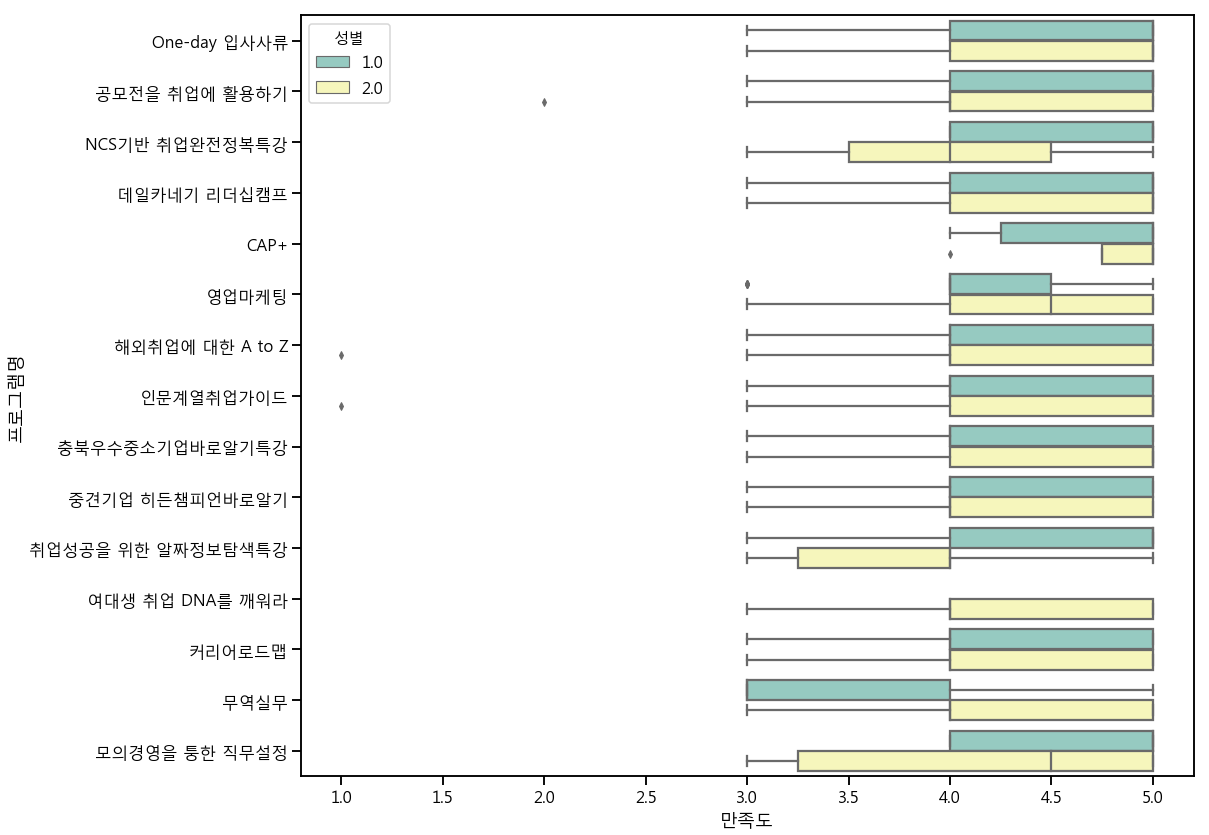

In [358]:
sns.boxplot(x='만족도',y='프로그램명',data=df, hue='성별', palette='Set3')

In [359]:
df['프로그램명'].value_counts()

One-day 입사사류         476
데일카네기 리더십캠프          161
커리어로드맵               143
충북우수중소기업바로알기특강       141
여대생 취업 DNA를 깨워라      100
해외취업에 대한 A to Z       99
중견기업 히든챔피언바로알기        97
공모전을 취업에 활용하기         96
취업성공을 위한 알짜정보탐색특강     78
인문계열취업가이드             65
영업마케팅                 39
NCS기반 취업완전정복특강        36
모의경영을 퉁한 직무설정         23
CAP+                  18
무역실무                  18
Name: 프로그램명, dtype: int64

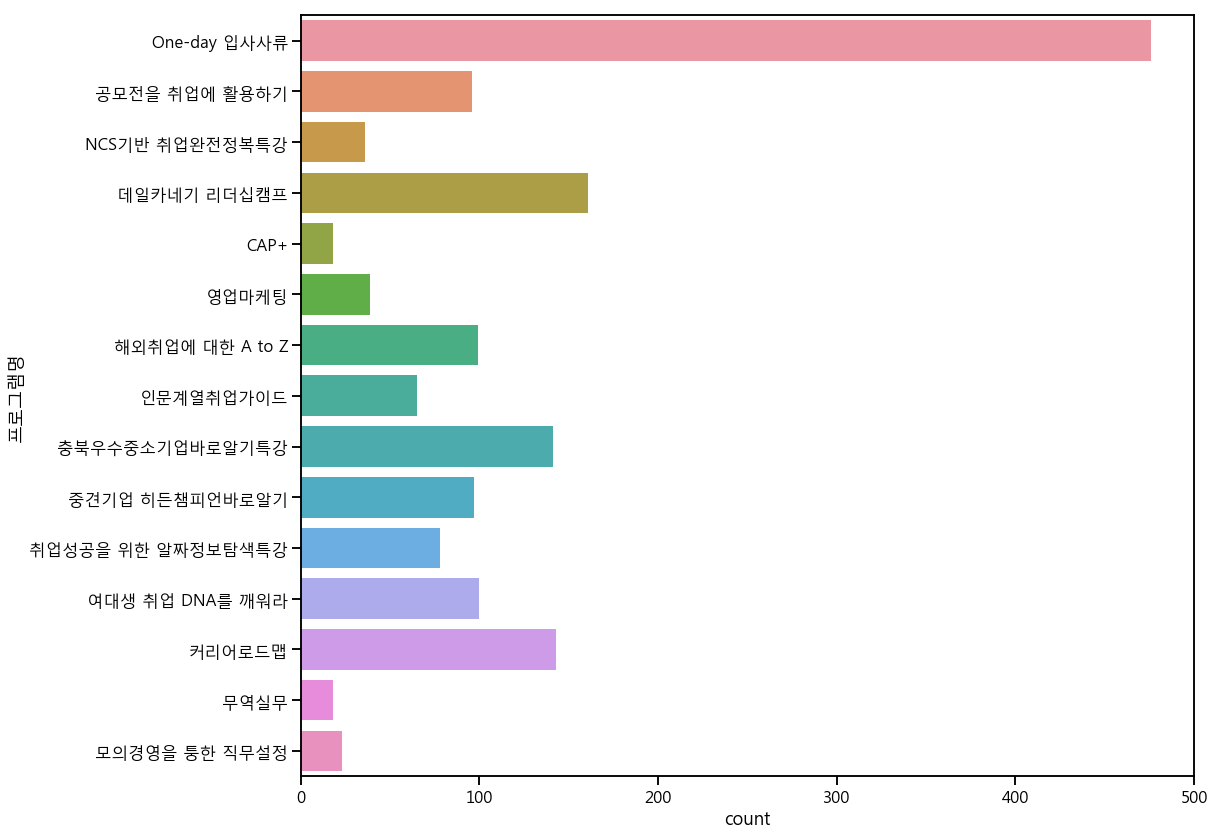

In [360]:
sns.countplot(y='프로그램명', data=df)

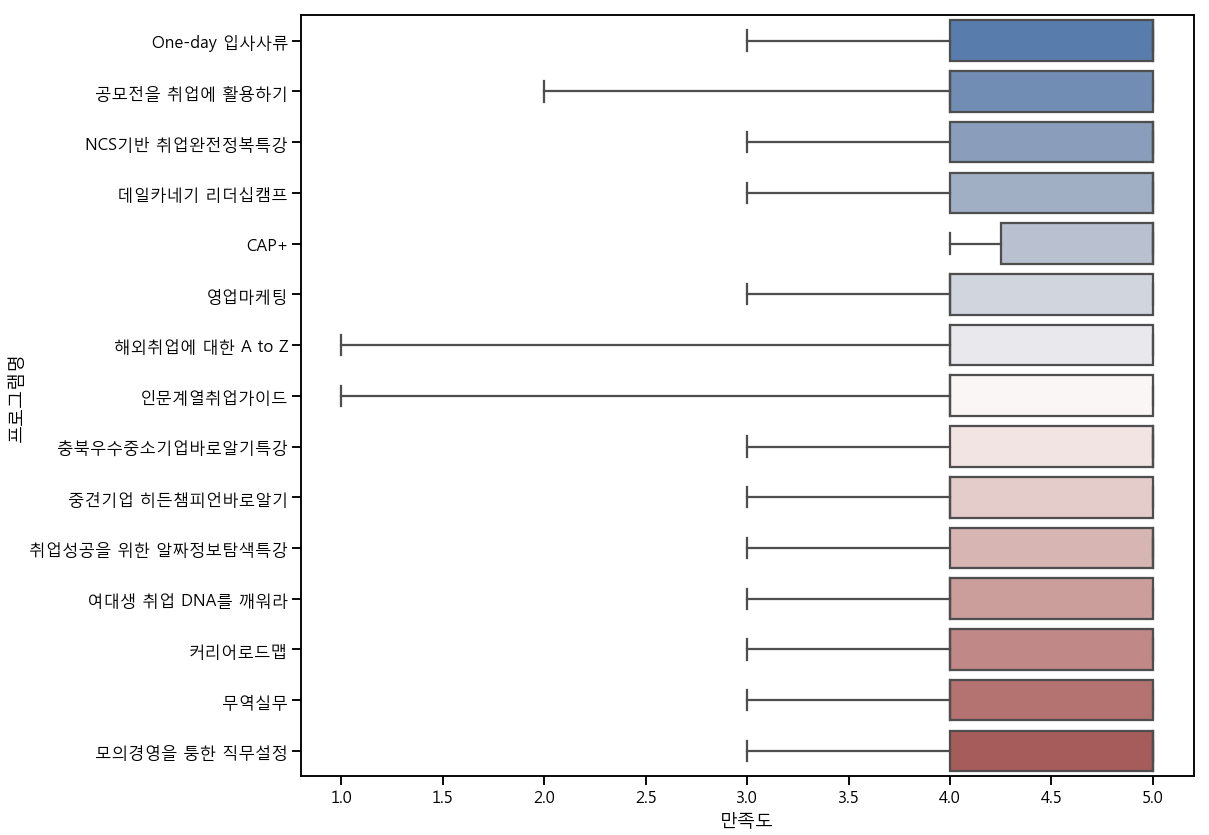

In [361]:
sns.boxplot(y='프로그램명', x = '만족도', data=df, whis="range", palette="vlag")

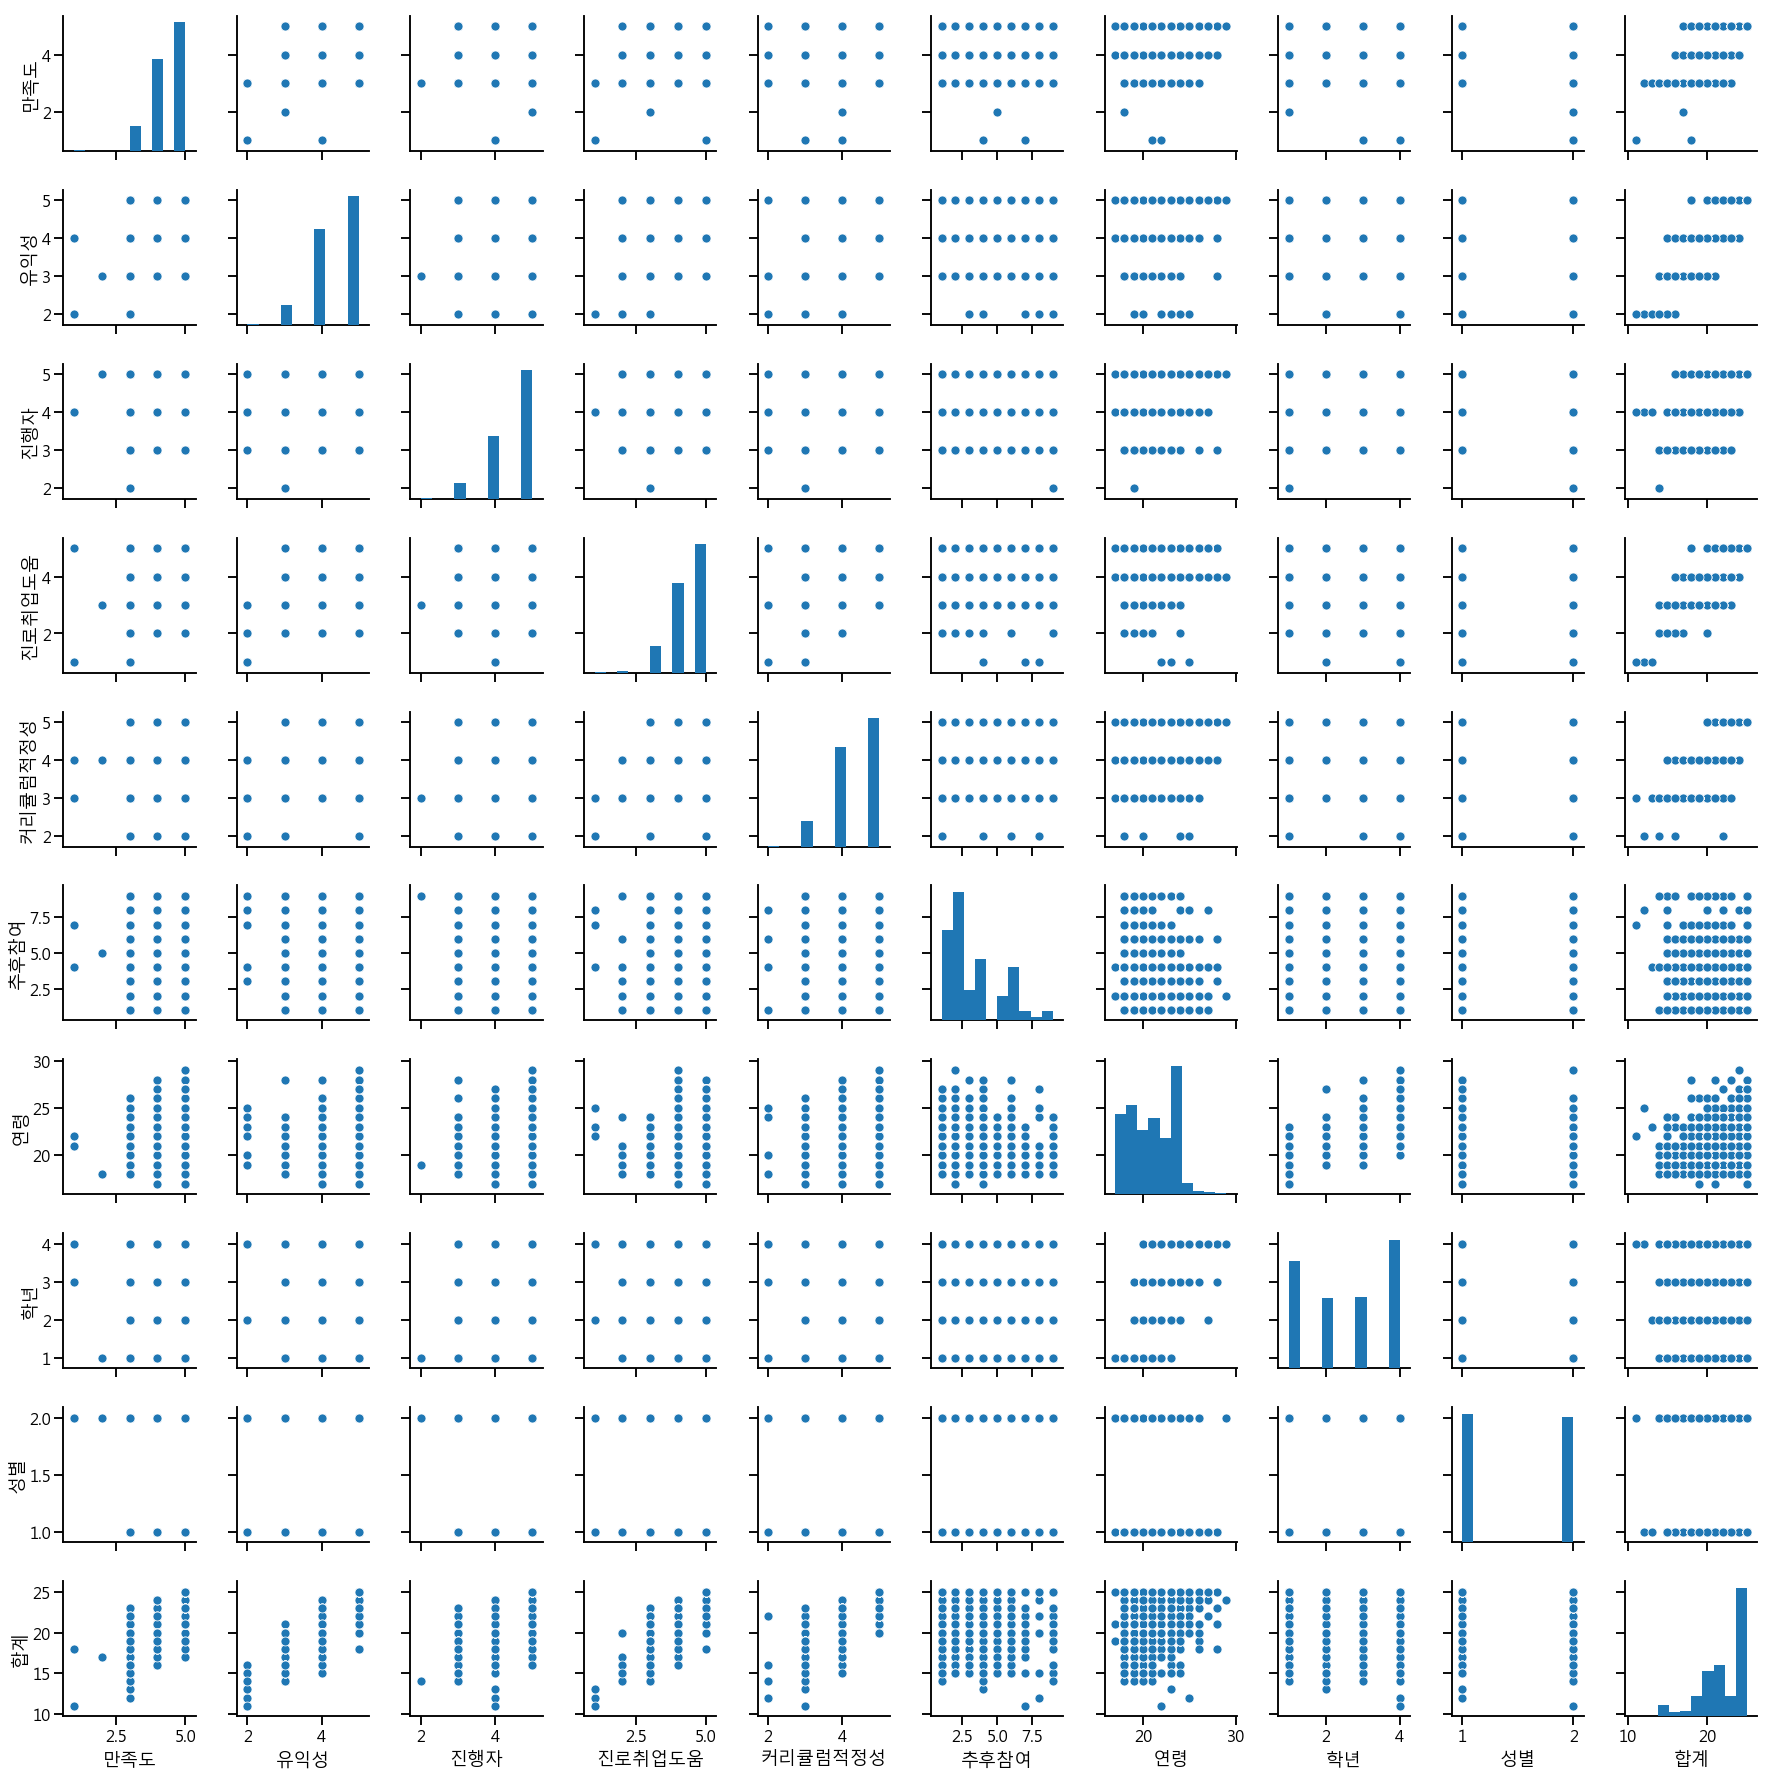

In [362]:
sns.pairplot(df)

In [363]:
dfval = df.iloc[:,:-5]
dfval.head()

,프로그램명,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여
0,One-day 입사사류,5,5,5,5,5,3.0
1,One-day 입사사류,5,5,5,5,5,3.0
2,One-day 입사사류,5,5,5,5,5,3.0
3,One-day 입사사류,5,5,5,5,5,3.0
4,One-day 입사사류,5,5,5,5,5,1.0


In [376]:
dfval['추후참여'].value_counts()

2.0    494
1.0    349
4.0    238
6.0    207
3.0    119
5.0     93
7.0     38
9.0     37
8.0     15
Name: 추후참여, dtype: int64

# Cluster Analysis
## 비교과 프로그램 참여학생을 만족도, 유익성, 진행자 등으로 군집화

In [366]:
le = LabelEncoder()
dfval['프로그램명'] = le.fit_transform(df['프로그램명'])
X = np.array(dfval.astype(float))

In [367]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.5476885843154716
For n_clusters = 3 The average silhouette_score is : 0.4010303030702873
For n_clusters = 4 The average silhouette_score is : 0.34679083698723095
For n_clusters = 5 The average silhouette_score is : 0.35697489460002196
For n_clusters = 6 The average silhouette_score is : 0.3493320613760495
For n_clusters = 7 The average silhouette_score is : 0.33579791282851484
For n_clusters = 8 The average silhouette_score is : 0.3014317425558897
For n_clusters = 9 The average silhouette_score is : 0.2960238768882974


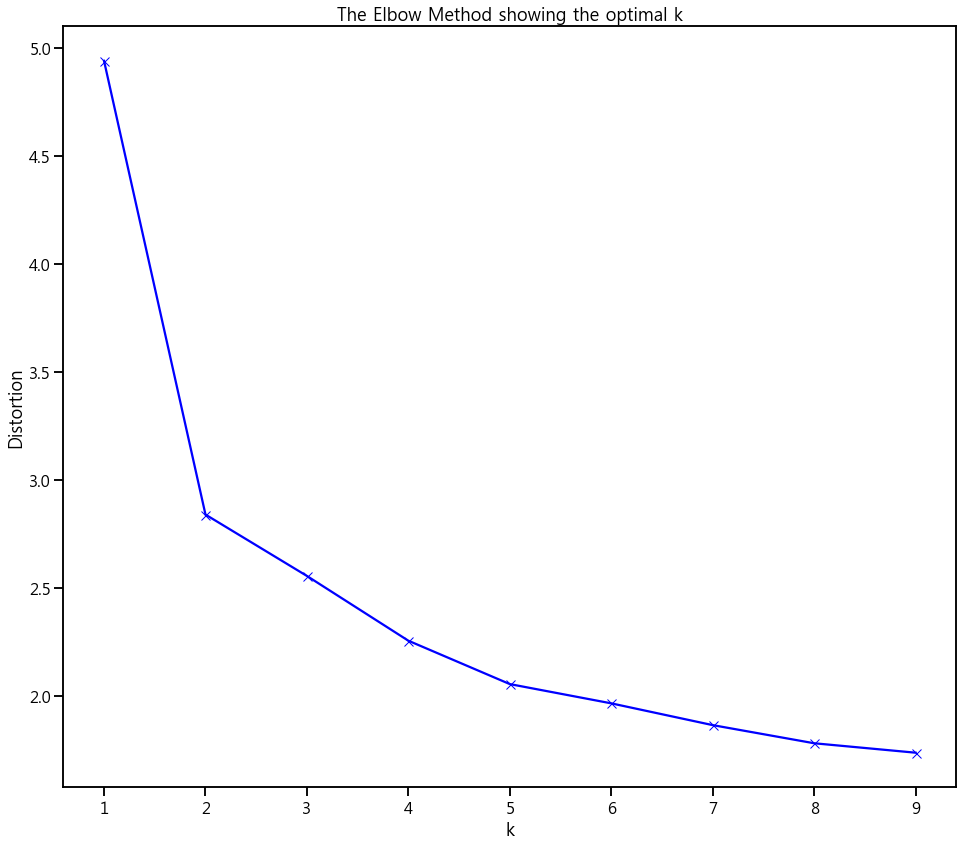

In [368]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)#.fit(X2)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [369]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("number of estimated clusters " , n_clusters_)

number of estimated clusters  2


In [370]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [371]:
dfval['cluster'] = clf.fit_predict(X)

In [373]:
dfval.iloc[:5,7]

0    0
1    0
2    0
3    0
4    0
Name: cluster, dtype: int32

# Principal Component Analysis
## 요인을 2개로 축소하여 군집이 의미있게 나누어지는지 분석함

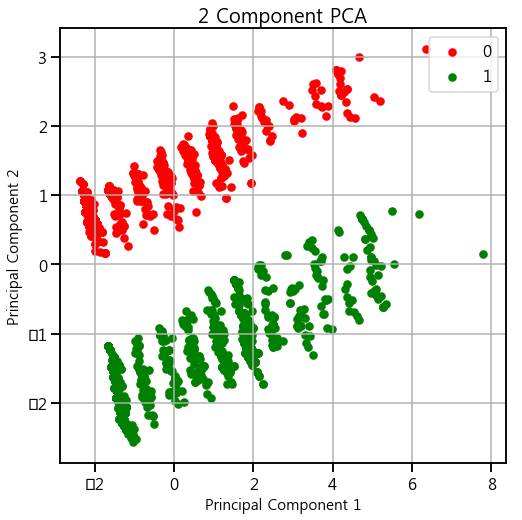

In [390]:
x2 = dfval.values
x2 = StandardScaler().fit_transform(x2)
pca2 = PCA(n_components=2)
pCom = pca2.fit_transform(x2)
pDf2 = pd.DataFrame(data = pCom, columns=['Principal Component 1', 'Principal Component 2'])
target = pd.DataFrame(data=dfval.iloc[:,7].values, columns=['target'])
#target = np.rint(target)
fDf2 = pd.concat([pDf2, target], axis=1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
#targets = ['Cluster 1', 'Cluster 2']
colors = ['r', 'g']
targets = [0, 1]
#targets = [1,2,3,4,5,6,7,8]
for target, color in zip(targets,colors):
    indicesToKeep = fDf2['target'] == target
    ax.scatter(fDf2.loc[indicesToKeep, 'Principal Component 1']
               , fDf2.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 2개의 클러스터로 분리
- 2종류의 프로그램
- 2종류의 학생

In [405]:
pd.crosstab(df['프로그램명'],dfval.cluster, margins=True)

cluster,0,1,All
프로그램명,,,
CAP+,18,0,18
NCS기반 취업완전정복특강,36,0,36
One-day 입사사류,476,0,476
공모전을 취업에 활용하기,96,0,96
데일카네기 리더십캠프,161,0,161
모의경영을 퉁한 직무설정,23,0,23
무역실무,18,0,18
여대생 취업 DNA를 깨워라,0,100,100
영업마케팅,0,39,39


In [388]:
grpdf.sort_values(by=['만족도','유익성','진행자','진로취업도움','커리큘럼적정성'],ascending=False)

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성
프로그램명,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778
데일카네기 리더십캠프,4.614907,4.546584,4.739130,4.472050,4.478261
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429
충북우수중소기업바로알기특강,4.489362,4.524823,4.546099,4.475177,4.432624
취업성공을 위한 알짜정보탐색특강,4.423077,4.461538,4.615385,4.410256,4.346154
모의경영을 퉁한 직무설정,4.391304,4.347826,4.434783,4.000000,4.347826
커리어로드맵,4.363636,4.384615,4.503497,4.300699,4.370629
공모전을 취업에 활용하기,4.312500,4.281250,4.541667,4.229167,4.218750


In [389]:
pd.crosstab(dfval.cluster, [df['성별'],df['학년']], normalize='index')

성별            1.0                                     2.0                      \
학년            1.0       2.0       3.0       4.0       1.0       2.0       3.0   
cluster                                                                         
0        0.083333  0.099034  0.056763  0.301932  0.086957  0.064010  0.042271   
1        0.161417  0.110236  0.146982  0.048556  0.245407  0.103675  0.139108   

성별                 
학년            4.0  
cluster            
0        0.265700  
1        0.044619

In [394]:
pd.crosstab(df['학과'], dfval.cluster, normalize='index')

cluster,0,1
학과,,
9999,1.000000,0.000000
건축학과,1.000000,0.000000
경영정보학과,0.409091,0.590909
경영학과,1.000000,0.000000
경영학부,0.000000,1.000000
경찰행정학과,0.444444,0.555556
광고홍보학과,0.314286,0.685714
교육학과,1.000000,0.000000
금융보험학과,0.400000,0.600000


In [416]:
pd.crosstab(dfval.cluster, df['학년'], normalize='index')

학년,1.0,2.0,3.0,4.0
cluster,,,,
0,0.170290,0.163043,0.099034,0.567633
1,0.406824,0.213911,0.286089,0.093176


In [417]:
pd.crosstab(dfval.cluster,df['성별'], normalize='index')

성별,1.0,2.0
cluster,,
0,0.541063,0.458937
1,0.467192,0.532808


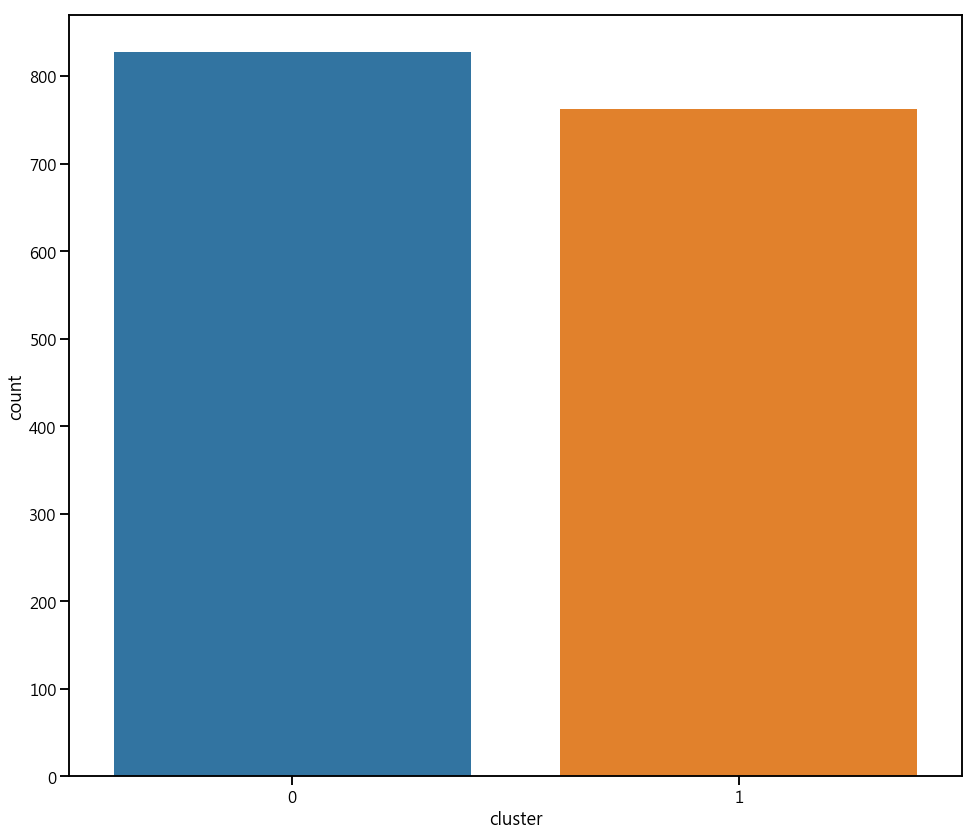

In [407]:
sns.countplot(x='cluster', data=dfval)

In [410]:
pd.crosstab(dfval['cluster'], [df['성별'],df['학년']], normalize='index')

성별            1.0                                     2.0                      \
학년            1.0       2.0       3.0       4.0       1.0       2.0       3.0   
cluster                                                                         
0        0.083333  0.099034  0.056763  0.301932  0.086957  0.064010  0.042271   
1        0.161417  0.110236  0.146982  0.048556  0.245407  0.103675  0.139108   

성별                 
학년            4.0  
cluster            
0        0.265700  
1        0.044619